# cross-section as a function of $Q^2$
do we have a case for $m_A$?

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/consequences/'

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


# apply the efficiency weights - if they were not computed yet

## Draw the cross-sections

In [9]:
mA_array = [0.7,0.8,0.9,0.95,0.99,0.99,1,1.1,1.2,1.3,1.5]
genie_mA_list   = ['0_70','0_80','0_90','0_95'
                   ,'0_99_nominal','0_99_19Dec2018'
                   ,'1_00','1_1','1_2','1_3','1_5']
genie_mA_labels = [r'$m_A=%.2f$'%mA for mA in mA_array]
genie_mA_colors = ['black','blue','red','green','yellow','purple','orange','cyan']

In [5]:
afro_genie_CC1p_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
for gname in genie_mA_list: 
    csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
    if os.path.isfile( csvfilename ):#{  and False
        afro_genie_CC1p_dict[gname] = pd.read_csv(csvfilename)
        print 'loaded',len(afro_genie_CC1p_dict[gname]),'afro GENIE CC1p '+gname+' events'
    #}
    else: #{
        print 'loading',gname
        afro_genie = pd.read_csv( path + 'CC_4_9E20_POT_mA_'+gname+'.csv')
        print 'loaded %d'%len(afro_genie),' events from ',gname
        afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                            & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                            & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                            & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                           ]
        afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                       ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                       ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
        print len(afro_genie_CC1p),'afro GENIE CC1p'
        afro_genie_CC1p_in_cuts = afro_genie_CC1p[(np.abs(afro_genie_CC1p['theta_12']-90)<delta_theta_12)
                                                  &(afro_genie_CC1p['Pt']<Pt_max)
                                                  &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]
        print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
        csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
        afro_genie_CC1p_in_cuts.to_csv(csvfilename)
        print 'saved ',len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p '+gname+' events to',csvfilename    
        afro_genie_CC1p_dict[gname] = afro_genie_CC1p_in_cuts    
    #}
print 'done loading afro GENIE files'

loaded 16189 afro GENIE CC1p 0_70 events
loaded 19582 afro GENIE CC1p 0_80 events
loaded 22023 afro GENIE CC1p 0_90 events
loaded 22235 afro GENIE CC1p 0_95 events
loaded 25833 afro GENIE CC1p 0_99_nominal events
loaded 23167 afro GENIE CC1p 0_99_19Dec2018 events
loaded 23466 afro GENIE CC1p 1_00 events
loaded 26465 afro GENIE CC1p 1_1 events
loaded 28333 afro GENIE CC1p 1_2 events
loaded 29860 afro GENIE CC1p 1_3 events
loaded 32896 afro GENIE CC1p 1_5 events
done loading afro GENIE files


# cross-section as a function of $Q^2$

chi2[0.70]=35.96, chi2/ndf=5.14
chi2[0.80]=21.32, chi2/ndf=3.05
chi2[0.90]=14.19, chi2/ndf=2.03
chi2[0.95]=15.60, chi2/ndf=2.23
chi2[0.99]=20.23, chi2/ndf=2.89
chi2[0.99]=14.62, chi2/ndf=2.09
chi2[1.00]=13.02, chi2/ndf=1.86
chi2[1.10]=13.86, chi2/ndf=1.98
chi2[1.20]=15.98, chi2/ndf=2.28
chi2[1.30]=21.34, chi2/ndf=3.05
chi2[1.50]=35.24, chi2/ndf=5.03
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/consequences/Q2_different_MA.pdf


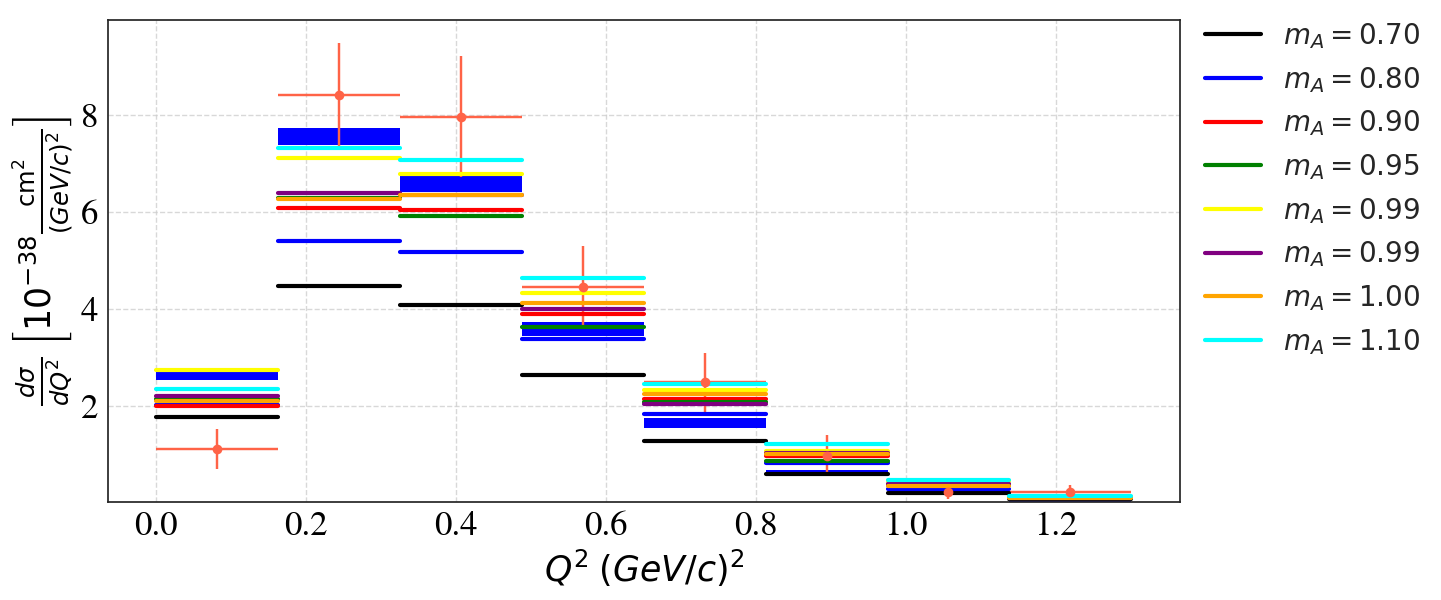

In [11]:
debug=0
bins=linspace(0.,1.3,9)
vlabel=r'Q^{2}'; units='(GeV/c)^2'
wname = 'Pmu weight'
fig,ax = plt.subplots(figsize=(12,6))
mid = 0.5*(bins[1:]+bins[:-1]); bin_width=bins[1:] - bins[:-1]
var='reco_Q2_mcs'
Xsec_ctu_title = Xsec_ctu_titles[0]
Xsec_dict = get_Xsec_variable(debug=debug,
                              var=var,bins=bins,                              
                              wname=wname,                              
                              remove_ctu_bin=True,                              
                              selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                              
                              selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)    
h = dict()
chi2 = dict()
h['Xsec'],h['Xsec err'] = Xsec_dict[var],Xsec_dict[var+' err']

ax.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],
            color=Colors['beam on'],fmt='o')        

h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+var], Xsec_dict['mc '+var+' err']
ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'],
       width=bin_width, color='blue')

genie_Xsec = dict()
genie_Xsec_err=dict()
for mA,gname,glabel in zip(mA_array,genie_mA_list,genie_mA_labels):
    genie_mA = afro_genie_CC1p_dict[gname]
    # remove last cos(theta(mu)) bin
    genie_mA = genie_mA[genie_mA['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
    h_genie,_ = np.histogram(genie_mA['truth_Q2'],bins=bins)
    h_genie_err = np.sqrt(h_genie)
    genie_Xsec[gname],genie_Xsec_err[gname] = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
    for i_bin in range(len(bins)-1):#{
        genie_Xsec[gname][i_bin],genie_Xsec_err[gname][i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20,  
                                                                   Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                                                                               
                                                                   bin_width=(bins[1]-bins[0]) )
    #}
    chi2[mA],ndf = chi2_two_data_curves(h1=genie_Xsec[gname],h1err=genie_Xsec_err[gname],
                                        h2=h['Xsec'],h2err=h['Xsec err'],bins=bins,
                                        debug=0)
    
    print "chi2[%.2f]=%.2f, chi2/ndf=%.2f"%(mA,chi2[mA],chi2[mA]/ndf)
for gname,glabel,gcolor in zip(genie_mA_list,genie_mA_labels,genie_mA_colors):
    for i_bin in range(len(bins)-1):#{
        genie_Xsec[gname][i_bin] = genie_Xsec[gname][i_bin]
        genie_Xsec_err[gname][i_bin] =  genie_Xsec_err[gname][i_bin]
    #}
    mystep(x=mid ,x_width=bin_width, y=genie_Xsec[gname], y_width=genie_Xsec_err[gname],
           color=gcolor,
#           linestyle=ls,
           linewidth=3, ax=ax,label=glabel)
    
set_axes(ax,x_label='$'+vlabel+'$' + r' $%s$'%units
                 ,y_label=get_Xsec_label(vlabel,units)
                 ,do_add_grid=True,do_add_legend=False, legend_loc='best')    
plt.legend(bbox_to_anchor=(1.,1.05),loc=2,fontsize=20)
plt.tight_layout()    
outfilename = figures_path + 'Q2_different_MA.pdf'    
save_figure(outfilename)

saved /Users/erezcohen/Desktop/chi2_mA.pdf


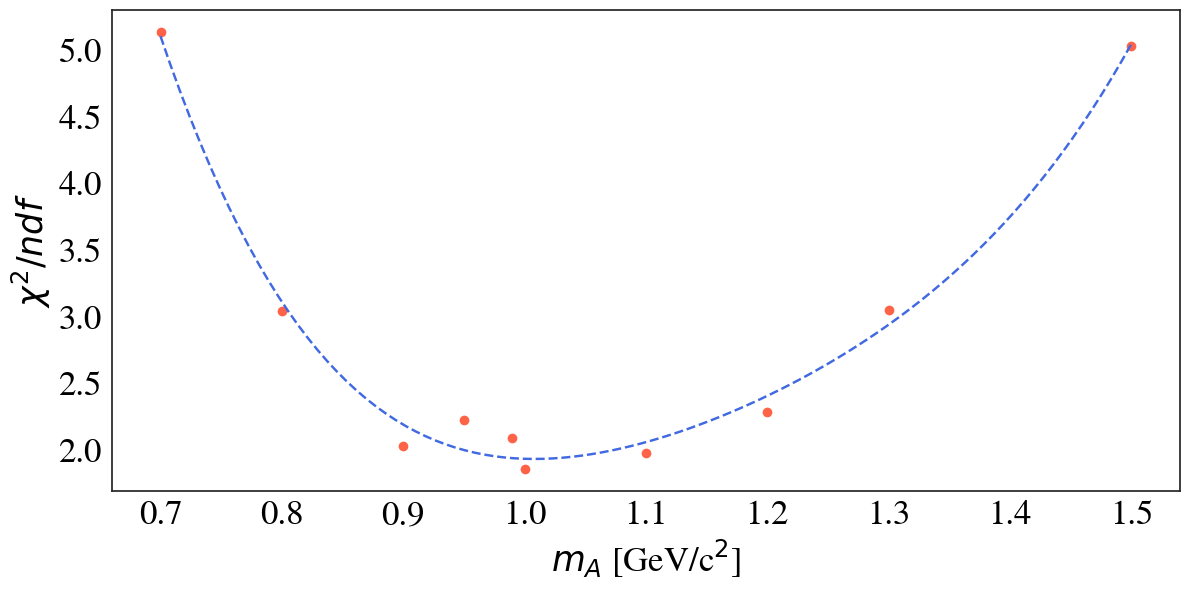

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
x,y = np.array(chi2.keys()),np.array(chi2.values())/ndf
plt.plot(x,y,'o',color=Colors['beam on'])

par = np.polyfit(x,y,deg=4)
poly = np.poly1d(par)
x_fit = linspace(np.min(x),np.max(x),100)
plt.plot(x_fit,poly(x_fit),'--',color='royalblue')

set_axes(ax,r'$m_A$ [GeV/c$^2$]',r'$\chi^2/ndf$')
plt.tight_layout()
save_figure('/Users/erezcohen/Desktop/chi2_mA.pdf')

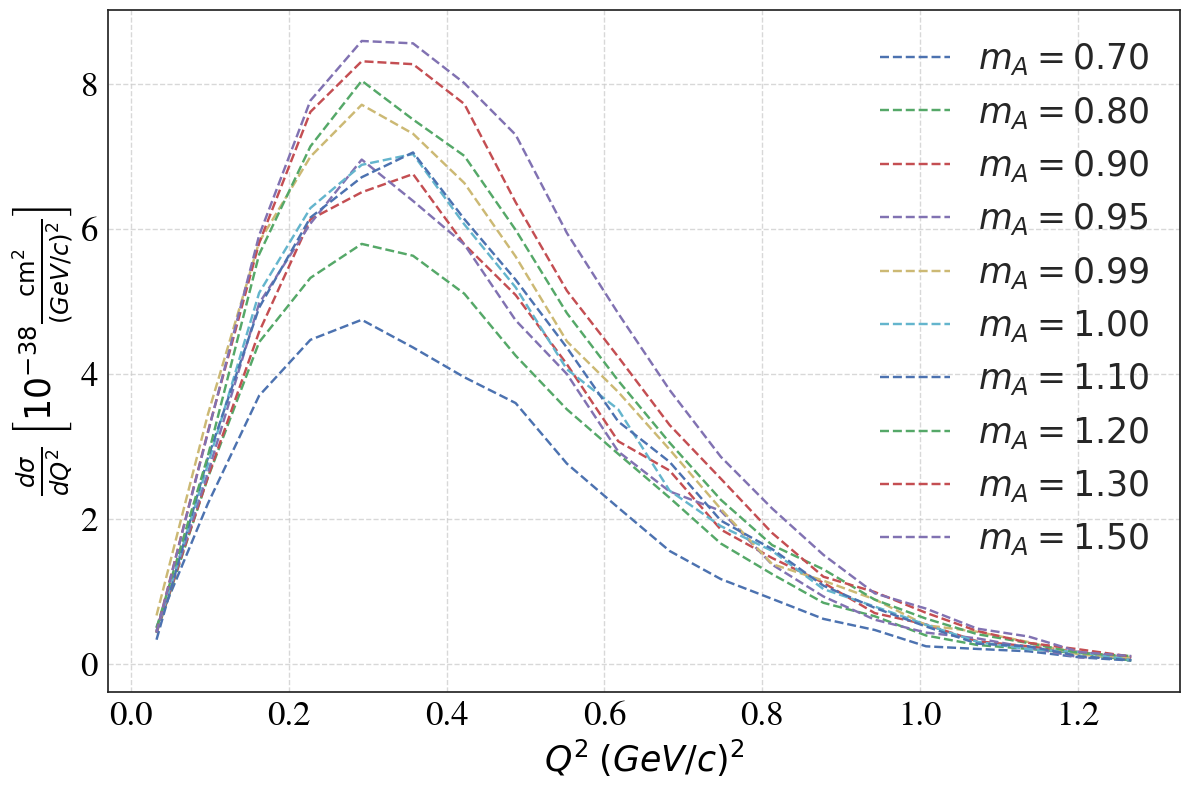

In [8]:
bins=linspace(0.,1.3,21)
vlabel=r'Q^{2}'; units='(GeV/c)^2'
wname = 'Pmu weight'
fig,ax = plt.subplots(figsize=(12,8))
mid = 0.5*(bins[1:]+bins[:-1]); bin_width=bins[1:] - bins[:-1]
var='reco_Q2_mcs'
Xsec_ctu_title = Xsec_ctu_titles[0]
Xsec_dict = get_Xsec_variable(debug=debug,
                                                       var=var,bins=bins,
                                                       wname=wname,
                                                       remove_ctu_bin=True,
                                                       selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                                                       selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)    
tot_Xsec_genie = dict()
genie_Xsec = dict()
genie_Xsec_err=dict()
for gname,glabel in zip(genie_mA_list,genie_mA_labels):
    genie_mA = afro_genie_CC1p_dict[gname]
    genie_mA = genie_mA[genie_mA['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
    h_genie,_ = np.histogram(genie_mA['truth_Q2'],bins=bins)
    h_genie_err = np.sqrt(h_genie)
    genie_Xsec[gname],genie_Xsec_err[gname] = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
    for i_bin in range(len(bins)-1):#{
        genie_Xsec[gname][i_bin],genie_Xsec_err[gname][i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20,  
                                                                   Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                                                                               
                                                                   bin_width=(bins[1]-bins[0]) )
    #}
    tot_Xsec_genie[gname] = np.sum(genie_Xsec[gname])
    
for gname,glabel in zip(genie_mA_list,genie_mA_labels):
    for i_bin in range(len(bins)-1):#{
        genie_Xsec[gname][i_bin] = genie_Xsec[gname][i_bin]
        genie_Xsec_err[gname][i_bin] =  genie_Xsec_err[gname][i_bin]
    #}
    plt.plot(mid,genie_Xsec[gname],label=glabel,linestyle='--')
    
set_axes(ax,x_label='$'+vlabel+'$' + r' $%s$'%units
                 ,y_label=get_Xsec_label(vlabel,units)
                 ,do_add_grid=True,do_add_legend=True, legend_loc='best')        
plt.tight_layout()    